In [22]:
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier

## Load and split data

In [27]:
train_dir = "train_cleaned.csv"
train_data = pd.read_csv(train_dir)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Columns: 107 entries, Available Extra Rooms in Hospital to City_Code_Patient_9
dtypes: bool(99), float64(7), int64(1)
memory usage: 49.5 MB


In [ ]:
#split our train and test and label
X = train_data.drop(columns=['Stay'])
y = train_data['Stay']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)      

In [ ]:
# Identify boolean columns
bool_columns = train_data.select_dtypes(include=['bool']).columns

# Convert boolean values to 0 and 1
train_data[bool_columns] = train_data[bool_columns].astype(int)



## Logistic Regression

In [ ]:
#call the Logisitic Regression function 
log_reg = LogisticRegression(max_iter=200, solver='saga', n_jobs=1)
log_reg.fit(X_train, y_train)  


y_pred_log_reg = log_reg.predict(X_test)  


print("Logistic Regression (All Features)")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))  

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg)) 

Logistic Regression (All Features)
Accuracy: 0.39927458861952014

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.07      0.11      4721
           1       0.41      0.47      0.44     15628
           2       0.42      0.68      0.51     17498
           3       0.33      0.20      0.25     11032
           4       0.00      0.00      0.00      2349
           5       0.37      0.47      0.41      7004
           6       0.00      0.00      0.00       549
           7       0.00      0.00      0.00      2051
           8       0.00      0.00      0.00       967
           9       0.00      0.00      0.00       553
          10       0.55      0.34      0.42      1336

    accuracy                           0.40     63688
   macro avg       0.23      0.20      0.19     63688
weighted avg       0.36      0.40      0.35     63688



c:\Users\jayjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jayjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jayjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

c:\Users\jayjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jayjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jayjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jayjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

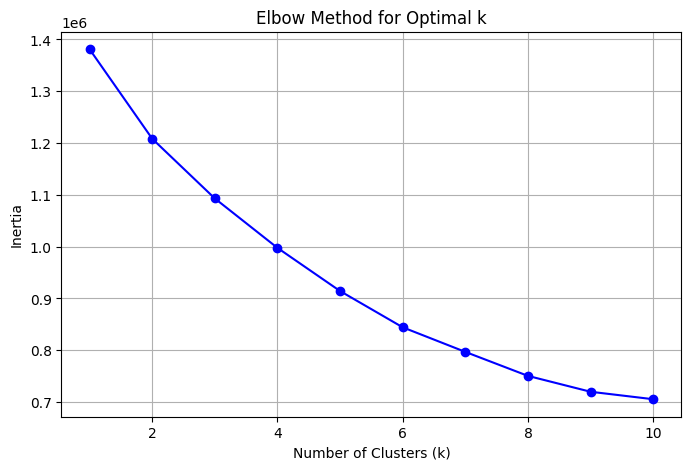

In [ ]:
#find the perfect amount of clusters via elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train) 
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

c:\Users\jayjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


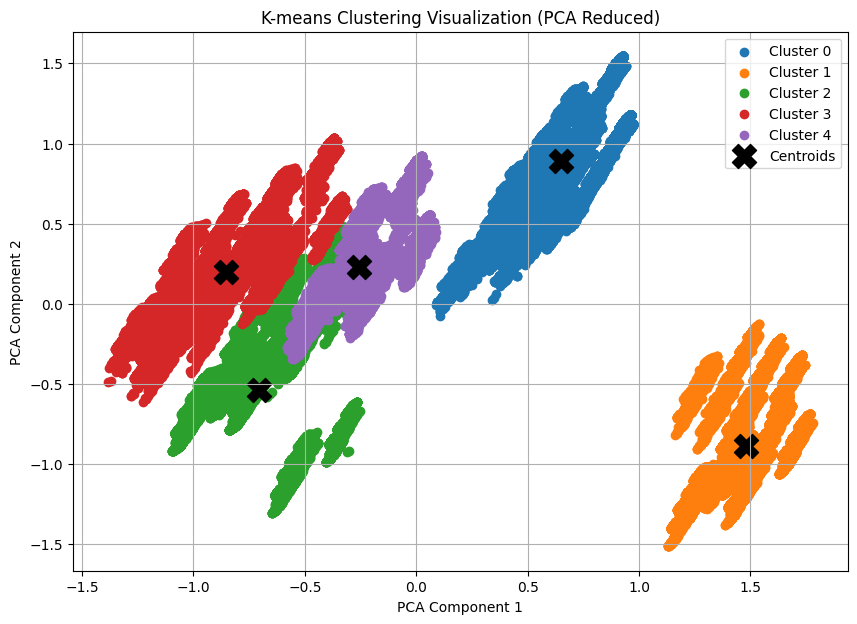

In [ ]:
#use optimal k to perform Kmeans and use PCA to plot it in a readable way
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)  

clusters = kmeans.fit_predict(X_train)


feature_names = train_data.drop(columns=['Stay']).columns 
X_train_scaled_df = pd.DataFrame(X_train, columns=feature_names)

X_train_scaled_df['Cluster'] = clusters


pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_train)


X_train_scaled_df['PCA1'] = pca_components[:, 0]
X_train_scaled_df['PCA2'] = pca_components[:, 1]


plt.figure(figsize=(10, 7))

for cluster in range(optimal_k):
    plt.scatter(
        X_train_scaled_df[X_train_scaled_df['Cluster'] == cluster]['PCA1'],
        X_train_scaled_df[X_train_scaled_df['Cluster'] == cluster]['PCA2'],
        label=f'Cluster {cluster}'
    )


centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=300, c='black', marker='X', label='Centroids')

plt.title('K-means Clustering Visualization (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Use a makeshift function to see how well the cluster performed 
#if the custers labeled the correct amount of stay then its correct
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train)  


y_pred_clusters = kmeans.predict(X_test)  


labels_map = {}


for cluster in range(10):
    mask = (kmeans.labels_ == cluster)  
    if np.sum(mask) > 0:
        majority_label = mode(y_train[mask], keepdims=True).mode[0]  
        labels_map[cluster] = majority_label

y_pred_mapped = np.array([labels_map[cluster] for cluster in y_pred_clusters])


accuracy = accuracy_score(y_test, y_pred_mapped)
print(f'K-Means Clustering Accuracy: {accuracy:.2f}')


print("\nClassification Report:")
print(classification_report(y_test, y_pred_mapped))




c:\Users\jayjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-Means Clustering Accuracy: 0.29

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4721
           1       0.31      0.24      0.27     15628
           2       0.28      0.84      0.42     17498
           3       0.00      0.00      0.00     11032
           4       0.00      0.00      0.00      2349
           5       0.00      0.00      0.00      7004
           6       0.00      0.00      0.00       549
           7       0.00      0.00      0.00      2051
           8       0.00      0.00      0.00       967
           9       0.00      0.00      0.00       553
          10       0.00      0.00      0.00      1336

    accuracy                           0.29     63688
   macro avg       0.05      0.10      0.06     63688
weighted avg       0.15      0.29      0.18     63688



c:\Users\jayjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jayjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jayjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Random Forest

In [ ]:
#a basic random forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)  


y_pred = rf_classifier.predict(X_test)  


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.38

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.17      0.21      4721
           1       0.39      0.44      0.41     15628
           2       0.41      0.53      0.46     17498
           3       0.33      0.28      0.30     11032
           4       0.08      0.02      0.04      2349
           5       0.38      0.45      0.41      7004
           6       0.07      0.02      0.03       549
           7       0.26      0.10      0.14      2051
           8       0.39      0.18      0.25       967
           9       0.28      0.07      0.11       553
          10       0.55      0.43      0.48      1336

    accuracy                           0.38     63688
   macro avg       0.31      0.24      0.26     63688
weighted avg       0.36      0.38      0.36     63688



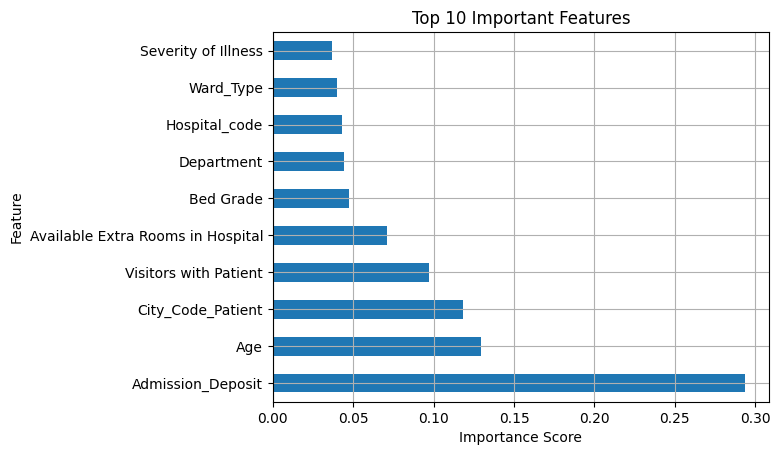

In [ ]:
#the original cleaning dataset used, and the feature important for it
feature_names = train_data.drop(columns=['Stay']).columns  


X_test_final_df = pd.DataFrame(X_test_scaled, columns=feature_names)


feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_test_final_df.columns)
feature_importances.nlargest(10).plot(kind='barh')


plt.title('Top 10 Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

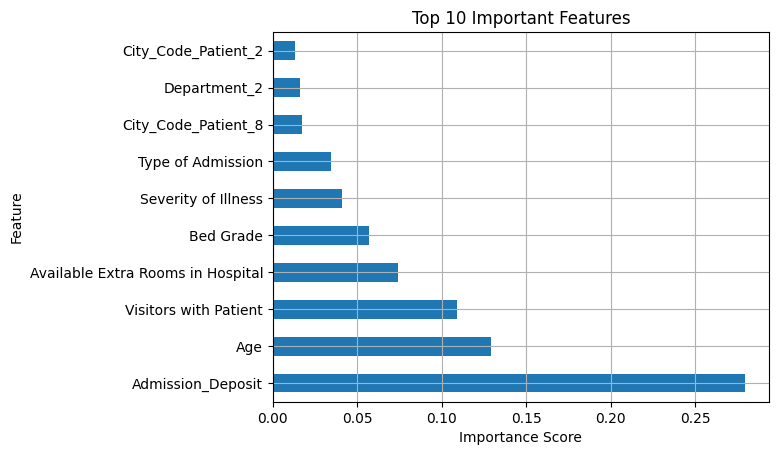

In [ ]:
#the new dataset and its important features
feature_names = train_data.drop(columns=['Stay']).columns  


X_test_final_df = pd.DataFrame(X_test, columns=feature_names)


feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_test_final_df.columns)
feature_importances.nlargest(10).plot(kind='barh')


plt.title('Top 10 Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

### HPO Tuning

In [ ]:
# Define hyperparameters to tune
#This was the OG dataset
param_grid = {
    'n_estimators': [50, 100, 200],        
    'max_depth': [None, 10, 20, 30],       
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4],        
    'max_features': ['sqrt', 'log2'],      
}

# Initialize Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,  # 5-Fold Cross Validation
    n_jobs=-1,
    verbose=2
)

# Fit Grid Search
grid_search.fit(X_train_scaled, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate Best Model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [ ]:
#fit the RF based on the HPO (I had to run it on my PC )
rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=10,
    random_state=42
)


rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.42

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.08      0.14      4689
           1       0.43      0.51      0.46     15561
           2       0.42      0.68      0.52     17603
           3       0.42      0.23      0.30     10981
           4       0.00      0.00      0.00      2357
           5       0.39      0.52      0.45      7128
           6       0.00      0.00      0.00       554
           7       0.80      0.00      0.00      2031
           8       0.62      0.01      0.02       941
           9       0.00      0.00      0.00       552
          10       0.60      0.34      0.43      1291

    accuracy                           0.42     63688
   macro avg       0.38      0.22      0.21     63688
weighted avg       0.42      0.42      0.38     63688



c:\Users\jayjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jayjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jayjo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

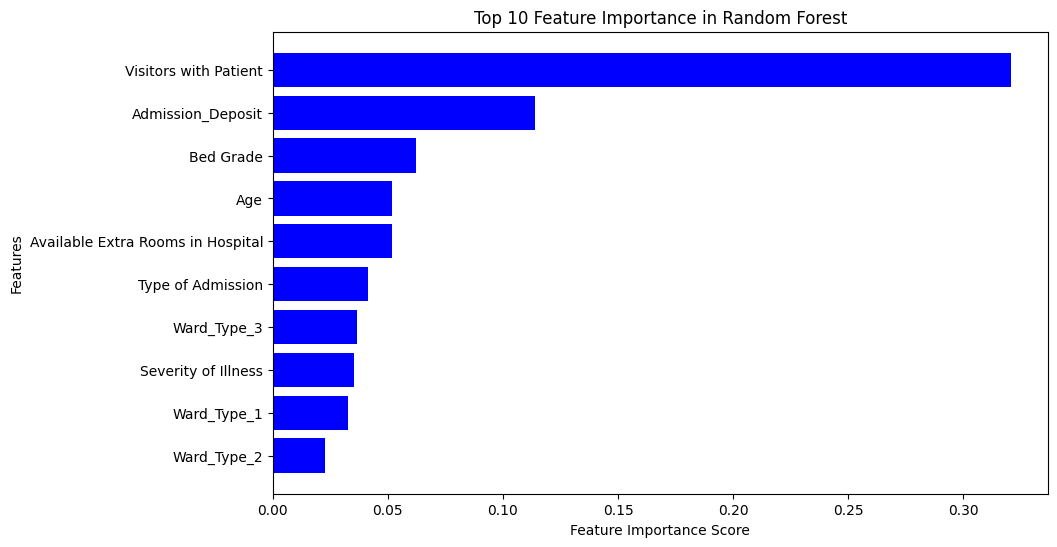

In [ ]:
#New dataset
# Extract feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test_final_df.columns, 'Importance': feature_importances})

# Sort features by importance and select top 10
top_10_features = feature_importance_df.nlargest(10, 'Importance')

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='blue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # Show the most important feature on top
plt.show()


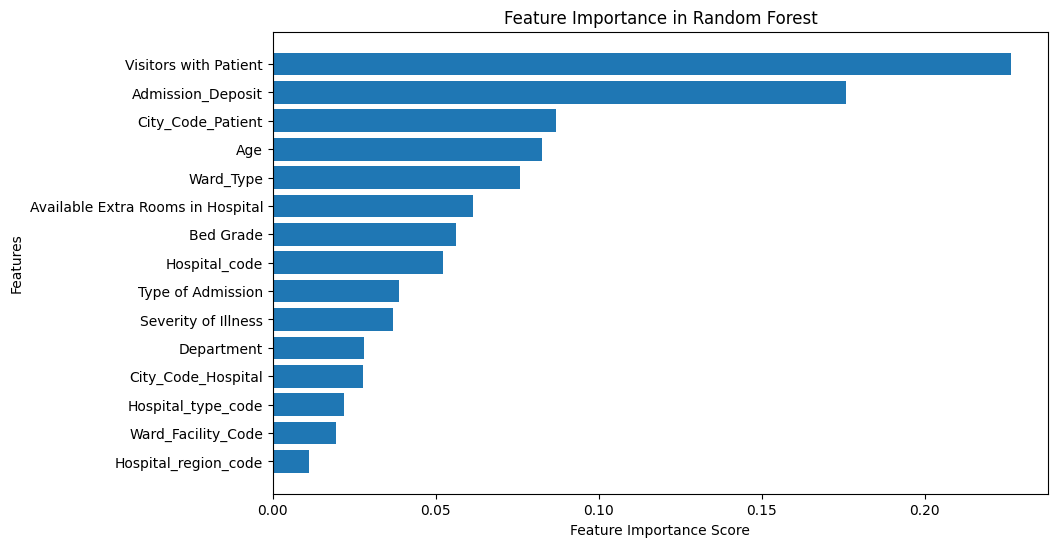

In [ ]:
#Old dataset
feature_importances = rf_classifier.feature_importances_


feature_names = X_test_final_df.columns 
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  
plt.show()




Random Forest After doing Feature selection

In [ ]:
#this all was done on the old dataset but the same logic holds
features_to_drop = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 
                     'Ward_Type', 'City_Code_Patient']

In [ ]:
#trying to figure out if wards and hospital codes are useful
X = train_data.drop(columns=['Stay'])
y = train_data['Stay']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)       




X_train_reduced = scaler.fit_transform(X_train.drop(columns=features_to_drop))
X_test_reduced = scaler.transform(X_test.drop(columns=features_to_drop))




In [ ]:
rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=10,
    random_state=42
)


rf_classifier.fit(X_train_reduced, y_train)


y_pred = rf_classifier.predict(X_test_reduced)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.38

Classification Report:
              precision    recall  f1-score   support

           1       0.34      0.13      0.18      4721
           2       0.38      0.47      0.42     15628
           3       0.40      0.59      0.48     17498
           4       0.34      0.21      0.26     11032
           5       0.00      0.00      0.00      2349
           6       0.35      0.43      0.38      7004
           7       0.00      0.00      0.00       549
           8       0.32      0.02      0.03      2051
           9       0.33      0.05      0.09       967
          10       0.20      0.00      0.00       553
          11       0.49      0.40      0.44      1336

    accuracy                           0.38     63688
   macro avg       0.29      0.21      0.21     63688
weighted avg       0.35      0.38      0.35     63688



It looks like those features did have an impact 